In [1]:


%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
trip = pd.read_csv('data/trip.csv', low_memory=False)
trip[:10]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [32]:
trip['InicioFin'] = (trip['start_station_id'].astype(str)+trip['end_station_id'].astype(str)).astype(int)
trip[:10]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,InicioFin,start_hour,end_hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,6666,14,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,1010,14,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2727,10,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,1010,11,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,6667,12,12
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,5959,18,18
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,45,13,13
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,88,14,14
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,6666,17,17
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,1011,11,11


In [ ]:
import calendar
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['end_date'] = pd.to_datetime(trip['end_date'])
trip['start_hour'] = pd.to_datetime(trip['start_date'], format = '%H', errors = 'coerce').dt.hour
trip['end_hour'] = pd.to_datetime(trip['end_date'], format = '%H', errors = 'coerce').dt.hour

<IPython.core.display.Javascript object>


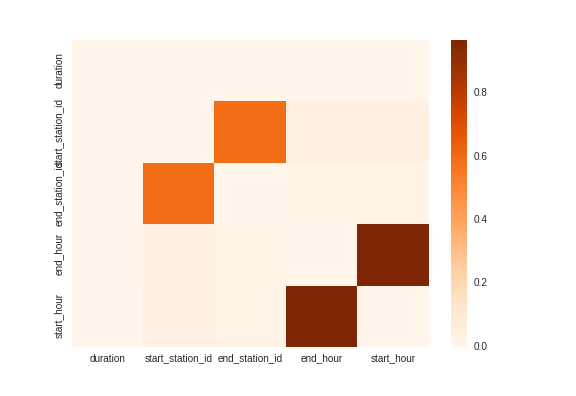

In [31]:
%matplotlib notebook

cor = trip.loc[:,['duration','start_station_id','end_station_id','InicioFin','end_hour','start_hour']].corr().abs()
cor.values[[np.arange(5)]*2] = 0
sns.heatmap(cor,cmap='Oranges');
#esto nos revela algo obvio pero no por eso menos util. Y es que hay una gran relacion entre de donde salimos y adonde vamos

In [21]:
cor

,duration,start_station_id,end_station_id,InicioFin
duration,0.000000,0.007839,0.006719,0.007572
start_station_id,0.007839,0.000000,0.595154,0.980021
end_station_id,0.006719,0.595154,0.000000,0.638880
InicioFin,0.007572,0.980021,0.638880,0.000000


In [27]:
trip['InicioFin'] = trip['start_station_id'].astype(str)+'/'+trip['end_station_id'].astype(str)
trip[:10]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,InicioFin,start_hour,end_hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,66/66,14,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,10/10,14,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,27/27,10,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,10/10,11,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,66/67,12,12
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,59/59,18,18
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,4/5,13,13
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,8/8,14,14
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,66/66,17,17
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,10/11,11,11


In [29]:
#me suena raro que la duracion no tenga que ver con el inicio y el fin.. por lo que lo revisamos.
#y no tamos que precisamanete no tiene una relacion direacta.
tripAux = trip.groupby('InicioFin')
tripAux = tripAux.get_group('66/66')
tripAux

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,InicioFin,start_hour,end_hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,66/66,14,14
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,66/66,17,17
28,5070,168,2013-08-29 21:43:00,South Van Ness at Market,66,2013-08-29 21:46:00,South Van Ness at Market,66,598,Subscriber,94115,66/66,21,21
79,4584,262,2013-08-29 14:17:00,South Van Ness at Market,66,2013-08-29 14:21:00,South Van Ness at Market,66,587,Subscriber,94612,66/66,14,14
514,4079,995,2013-08-29 09:35:00,South Van Ness at Market,66,2013-08-29 09:52:00,South Van Ness at Market,66,327,Subscriber,94102,66/66,9,9
643,4323,1397,2013-08-29 12:10:00,South Van Ness at Market,66,2013-08-29 12:34:00,South Van Ness at Market,66,626,Subscriber,94115,66/66,12,12
757,6393,134,2013-08-30 19:32:00,South Van Ness at Market,66,2013-08-30 19:34:00,South Van Ness at Market,66,618,Subscriber,94102,66/66,19,19
758,5947,140,2013-08-30 15:22:00,South Van Ness at Market,66,2013-08-30 15:25:00,South Van Ness at Market,66,560,Customer,NaN,66/66,15,15
765,5744,182,2013-08-30 14:00:00,South Van Ness at Market,66,2013-08-30 14:03:00,South Van Ness at Market,66,395,Customer,85008,66/66,14,14
941,5774,481,2013-08-30 14:16:00,South Van Ness at Market,66,2013-08-30 14:24:00,South Van Ness at Market,66,560,Subscriber,94612,66/66,14,14
